# Image Interpretation – Assignment 3

This assignment on Regression covers the labs from 10th and 17th of October. The exercises on this sheet are graded by a maximum of 10(+4) points. You will be asked to implement several functions and write a brief report.

In order to submit the results, send this ipynb file which should contain implemented functions and brief reports with all findings to <mikhail.usvyatsov@geod.baug.ethz.ch> with subject
[Image Interpretation 2019 Assignment 3]
no later than on the
24th of October, 2019.

Your functions should work when called by the provided test code (functions prefixed with `test` ) which must not be modified. When run, they should produce a plausible output, no warnings, and no unnecessary output. Eventual example output is given in the ref_-images. The functions that you write take images as arguments, not image filenames (i.e. do not use imread inside the functions). Your functions should not generate figures/plots themselves, the plots are generated by the test functions.

In addition to the functions, include a brief report explaining the structure of the code and the Python functions used. This includes the reasons for choosing particular functions as well as a short justification of their parameter setting. For the more complicated tasks, the choice of the underlying data structures and algorithms should be explained too. We encourage you to add also diagrams, illustrations, and figures into the report when appropriate, but it is not necessary to copy the related theory from the lecture slides. The code should contain comments if appropriate.

**Team work is not allowed**. Everybody implements his/her own code and writes his/her own report. Discussing issues with others is fine, sharing code and/or report with others is **not**. If you use any code fragments found on the Internet, make sure you reference them properly.

$\def\sc#1{\dosc#1\csod} \def\dosc#1#2\csod{{\rm #1{\small #2}}}$

In this assignment, $Y$ stands for a column vector of “target” values, that is the $i$-th row of Y contains the desired output for the i-th data point. $X$ is a matrix containing the input, where the $i$-th row contains the input values for the $i$-th data point. Often we want to add a constant term in our regression methods. For simplicity, this is done by adding a column of ones to our input data, in $\sc{Python}$ e.g. by doing:

`np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)`

The core of many regression methods is least-squares fitting. If we have a linear model

$$Y = X_{\text{ext}}\theta$$

it is usually over-determined, which means we can not find a $\mathbf{\theta}$ that fulfills this
equation exactly. Instead, we are looking for a $\mathbf{\theta}$ that minimizes the squared error

$$\theta = \arg \min_{\theta^\prime} \|Y - X_\mathsf{ext}\theta^\prime\|^2$$

which is done in $\sc{Python}$ by: `theta = numpy.linalg.lstsq(X_ext, Y)`

(see documentation of $\sc{Python}$ function [numpy.linalg.lstsq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html)).

If we want to use this $\mathbf{\theta}$ to estimate the values at new input positions, we extend the new input matrix with ones and multiply by $\mathbf{\theta}$:

```
X2_ext = np.concatenate((X2, np.ones((X2.shape[0], 1))), axis=1)
Y2 = np.dot(X2_ext, theta)
```

The function `lineardemo` performs this workflow on some synthetically generated data and shows the values of each variable that is changed, so you can watch what happens during evaluation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline

def lineardemo():
    # input values
    X = np.arange(10)
    # target results
    Y = 0.5 + 0.3 * X + np.random.randn(X.shape[0]) * 0.2
    # % show raw values
    plt.figure(figsize=(10, 8))
    plt.scatter(X,Y, label='real points')
    # extend with ones
    X_ex = np.concatenate((X.reshape(-1, 1), np.ones((X.shape[0], 1))), axis=1)
    # determine optimal parameters
    theta = np.linalg.lstsq(X_ex, Y, rcond=-1)[0]

    X2 = np.array((-1, 11))
    # for testing, again extend
    X2_ex = np.concatenate((X2.reshape(-1, 1), np.ones((X2.shape[0], 1))), axis=1)
    # determine y values
    Y2 = np.dot(X2_ex, theta)

    plt.plot(X2, Y2, label='fitted line')
    plt.legend(loc='best')

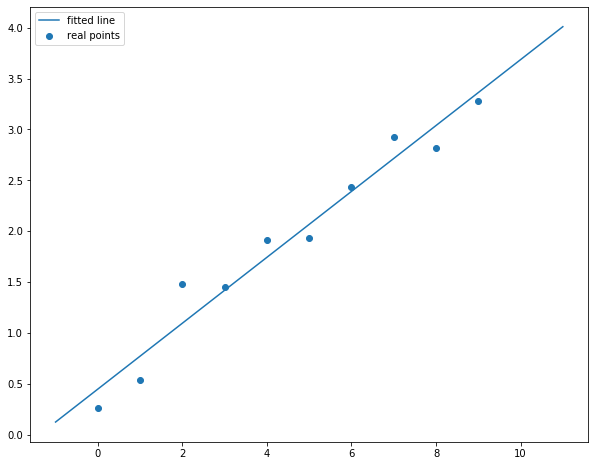

In [2]:
lineardemo()

# Problem 1 3P.

In this exercise you are given a timeseries (just some observations) that was artificially generated (see file  _timeseries.csv_). It was obtained combining some known to me and unknown to you polynomial (e.g. $y(t) = t^2 + 2$) plus some random noise. Your task is to find the parameters of the polynomial model that was used.
	
Use `pandas.read_csv('./materials/timeseries.csv')` to load the data. In order to visualize data use `plt.plot(timeseries)`.
	
Polynomial fitting is a traditional application of linear regression. Implement function `ii_fit_poly` that fits a polynomial to the input data. The function should take three arguments: the input data (as a column vector), a column vector of target values, and the desired degree of the polynomial (a non-negative integer). Return your estimated
model (theta).

Also, implement function `ii_apply_poly` that takes two arguments: a model (as returned by your function `ii_fit_poly`) and a column vector of points on which to evaluate the model. Return the estimated values as a column vector.
	
A helper function that extends the feature vector with the polynomial terms (computes $X_\text{ext}$ from $X$ for a given degree) might be useful, as polynomial fits are also going to be used in later exercises. You can use function `test_poly` to test your implementation.
	
You have to research which degree works better (in a range [1, 10]) and report it.

In [3]:
import pandas as pd

In [4]:
def ii_fit_poly(X, y, degree):
    # IMPLEMENT ME: here
    
    # extend the feature vector with the polynomial terms
    X_ex = ii_ex_poly(X, degree)
    
    # determine optimal parameters by polynomial fitting
    model = np.linalg.lstsq(X_ex, y, rcond=-1)[0]
    
    return model

In [5]:
def ii_ex_poly(X, degree):
    
#     # WAY 1: compute the polynomial terms using array datatype
#     X_ex = X.reshape(-1,1)
    
#     # compute X_poly with given degrees to be later linearly fitted
#     for i in range(1, degree):
#        X_poly = pow(X,i+1).reshape(-1,1)
#        X_ex = np.concatenate((X_ex,X_poly), axis=1)

    # WAY 2: compute the polynomial terms using list datatype
    X_ex = []
    
    for i in range(1, degree+1):
        X_ex.append(pow(X,i))
        
    X_ex = np.transpose(np.array(X_ex))
    
    # extend with ones
    X_ex = np.concatenate((X_ex,np.ones((X.shape[0], 1))), axis=1)
    
    return X_ex

In [6]:
def ii_apply_poly(theta, x):
    
    # calculate the degree
    degree = theta.shape[0]-1 

    # extend the feature vector with the polynomail terms
    X_ex = ii_ex_poly(x, degree)
    
    # fit the data with optical parameters
    estimated_y = np.dot(X_ex, theta)
    
    return estimated_y

In [7]:
def test_poly():
    degrees = np.arange(1,11)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 14))
    
    timeseries = np.array(pd.read_csv('../materials/timeseries.csv', header=None))
    x = timeseries[1, :]
    y = timeseries[0, :]
    poly_mses = [] # added line
    
    labels = ['Degree {}'.format(i) for i in degrees]
    axes[0].scatter(x, y, label='Data')
    
    for i in range(len(degrees)):
        theta = ii_fit_poly(x, y, degrees[i])
        estimated_y = ii_apply_poly(theta, x)
        axes[0].plot(x, estimated_y, label=labels[i])
        poly_mses.append(np.mean((y-estimated_y)**2)) # added line - calculate MSE as the cost
        
    axes[0].legend(loc='best')
    axes[0].set_title('Poly fit')
    
    axes[1].plot(degrees, poly_mses)
    axes[1].set_title('Cost - MSE')
    
    print('Result for Linear Regression')
    print('Degree:', degrees)
    print('MSE:', np.round(poly_mses,2)) # added line - round to 2nd decimal to print
    
    return poly_mses # added line

Result for Linear Regression
Degree: [ 1  2  3  4  5  6  7  8  9 10]
MSE: [322.85 293.34  87.74  76.04  75.99  75.98  75.92  75.82  75.82  75.64]


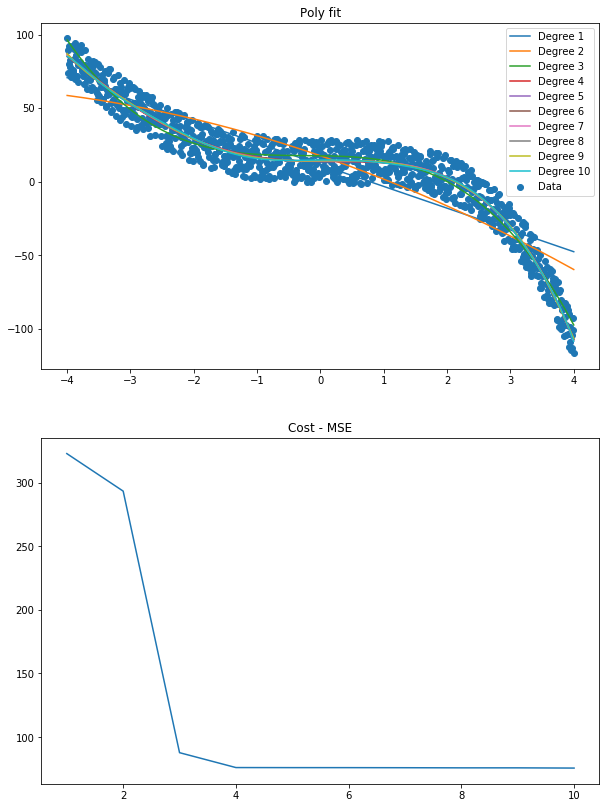

In [8]:
poly_mses = test_poly()

## Report: Part 1 - Polynomial fitting
**You have to research which degree works better (in a range [1, 10]) and report it.**

The polynomial fitting is still treated as the linear fitting here with the polynomial terms of feature vector acting as a basis function to be linearly fitted using `np.linalg.lstsq`. Overall, it is achieved by three main functions. `ii_ex_poly` is used to generate the polynomial terms by the given feature vector and degree. `ii_fit_poly` determines the optical polynomial parameters to the input data. `ii_apply_poly` returns the estimated target value using the optimal parameters and input data. Pay attention that the input matrix should be finally extended with ones corresponding to the constant terms in fitting functions.

To test the fitting effects, the mean squared differences between estimated target values and given ones (MSE) is chosen as the cost function. MSEs for each respective degree are calculated and plotted in `test_poly`. The less the MSE is, the better the fitting result is. According to the above criteria, $degree = 10$ works best for its minimum MSE value.

While it is always the case that the cost will decrease with increasing degrees. Overfitting happens under cases of larger degrees. To further answer the question, those degrees from the one whose MSE doesn't change obviously compared to the last one are all omitted. In this way, as shown from the line chart and statistics of MSEs, we can conclude that the elbow point/the best choice exists at $degree = 4$, since the cost doesn't get much smaller with the degree increasing, which can be validated in Problem 2 by ridge regression.

# Problem 2. 2P.
Regularization is important for avoiding overfitting on a noisy data input.
* Implement function `ii_fit_poly_ridge` that fits a polynomial to the input data using ridge regression. It should take the same arguments as `ii_fit_poly`, except for an additional argument which is the regularization strength $\lambda$.

You can use ridge regression from here `sklearn.linear_model.ridge_regression`.
	
You can use function `test_poly_ridge` to test your implementation.
	 
* Try to regularize your model for the Exercise 1 problem.
* Experiment how $\lambda$ influences the quality of your model
(to do that you can try to use cross-validation that is not compulsory, but strongly recommended).
	
* Provide the parameters of your best model in the report.

In [9]:
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import RidgeCV

In [10]:
def ii_fit_poly_ridge(X, y, degree, lam):
    # IMPLEMENT ME: here
    
    # extend the feature vector with the polynomial terms
    X_ex = ii_ex_poly(X, degree)
    
    # determine optimal parameters by ridge fitting
    model = ridge_regression(X_ex, y, lam)

    return model

In [11]:
def ii_fit_poly_ridge_cv(degree):
    lambdas = [1e-7, 1e-3, 1, 100, 1000]
    
    timeseries = np.array(pd.read_csv('../materials/timeseries.csv', header=None))
    x = timeseries[1, :]
    y = timeseries[0, :]
    
    x_ex = ii_ex_poly(x,degree)
    ridge_cv = RidgeCV(lambdas, store_cv_values=True)
    ridge_cv.fit(x_ex,y)
    
    cv_alpha = ridge_cv.alpha_
    cv_mse = np.mean(ridge_cv.cv_values_, axis=0)[lambdas.index(cv_alpha)] # return MSE for the best alpha
    cv_coef = ridge_cv.coef_
    
    print('Best Parameter:', ridge_cv.coef_)
    
    return cv_alpha, cv_mse, cv_coef

In [12]:
def test_poly_ridge():
    degree = 4
    lambdas = [0, 1e-7, 1e-3, 1, 100, 1000]
    plt.figure(figsize=(10, 8))
    
    timeseries = np.array(pd.read_csv('../materials/timeseries.csv', header=None))
    x = timeseries[1, :]
    y = timeseries[0, :]

    labels = ['Lambda {}'.format(i) for i in lambdas]
    plt.scatter(x, y, label='Data')
    
    for i in range(len(lambdas)):
        theta = ii_fit_poly_ridge(x, y, degree, lambdas[i])
        estimated_y = ii_apply_poly(theta, x)
        plt.plot(x, estimated_y, label=labels[i])
        
    plt.title('Ridge poly fit when degree='+str(degree))
    plt.legend(loc='best')

In [13]:
def test_poly_ridge_cv():
    degrees = np.arange(1,11)
    cv_alphas = []
    cv_mses = []
    cv_coefs = []

    # examine fitting result with different degrees
    for i in degrees:
        ridge_res = ii_fit_poly_ridge_cv(i) # for each degree, examine results with different lambdas
        cv_alphas.append(ridge_res[0])
        cv_mses.append(ridge_res[1])
        cv_coefs.append(ridge_res[2])

    print('Parameters for Ridge Regression using Cross Validation under different degrees')
    print('Degree:', degrees)
    print('Poly fit - MSE:', np.round(poly_mses,2))
    print('Ridge fit - Best alpha:', cv_alphas)
    print('Ridge fit - MSE:', np.round(cv_mses,2))

    # find the minimum mse under all conbinations of examined degrees and lambdas
    best_mse = min(cv_mses)
    best_degree = degrees[cv_mses.index(best_mse)]
    best_alpha = cv_alphas[cv_mses.index(best_mse)]
    best_coef = cv_coefs[cv_mses.index(best_mse)]

    print('\n')
    print('Best parameters for Ridge Regression Using Cross Validation')
    print('Best degree:', best_degree)
    print('Best alpha:', best_alpha)
    print('Best parameter:', best_coef)
    print('Best Cost:', best_mse)

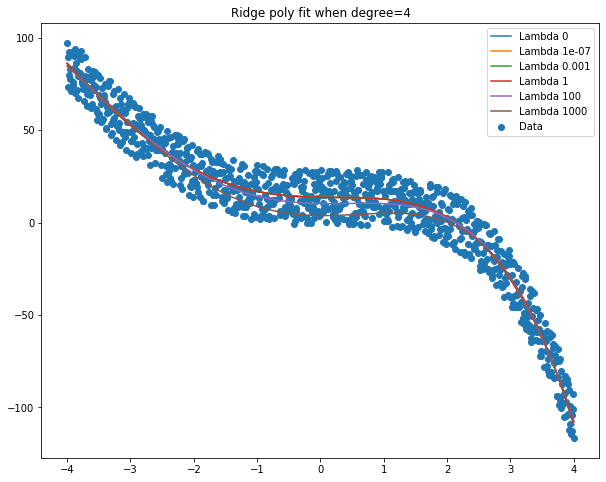

In [14]:
test_poly_ridge()

In [15]:
test_poly_ridge_cv()

Best Parameter: [-14.798172   0.      ]
Best Parameter: [-14.79814339  -1.13658524   0.        ]
Best Parameter: [-0.53794031 -1.13144847 -1.4813915   0.        ]
Best Parameter: [-0.53794031  1.19927235 -1.4813915  -0.17035178  0.        ]
Best Parameter: [-0.27428851  1.19927235 -1.56457884 -0.17035178  0.00482609  0.        ]
Best Parameter: [-0.27428851  0.86260493 -1.56457884 -0.10515381  0.00482609 -0.00303826
  0.        ]
Best Parameter: [-1.49668713e-01  8.62604935e-01 -1.65164642e+00 -1.05153808e-01
  1.78165498e-02 -3.03825954e-03 -5.24468071e-04  0.00000000e+00]
Best Parameter: [-1.49668713e-01  1.87758404e-01 -1.65164642e+00  1.61246280e-01
  1.78165498e-02 -3.39534495e-02 -5.24467984e-04  1.07822629e-03
  0.00000000e+00]
Best Parameter: [-3.37754501e-01  1.87758404e-01 -1.36112012e+00  1.61246280e-01
 -6.65368015e-02 -3.39534496e-02  7.71149226e-03  1.07822591e-03
 -2.56627856e-04  0.00000000e+00]
Best Parameter: [-3.37754501e-01 -2.25893135e-01 -1.36112012e+00  5.0017817

## Report: Part 2 - Ridge fitting
**Experiment how λ influences the quality of your model. Provide the parameters of your best model in the report.**

Over-fitting could easily happen under high-degree cases. Ridge fitting is designed to avoid over-fitting by adding a penalty equivalent to the sqaure of the magnitude of the coefficients multiplied by a parameter lambda. When lambda is zero, the fitting becomes the polynomial fitting in our situation. The Ridge Regression is implemented using `ridge_regression` from `sklearn` package in `ii_fit_poly_ridge` function. Cross-validation is another way to help solve over-fitting problems by dividing input data into several subdivisions and train from part of them and validate one the remaining ones. 

To carry out cross-validation for ridge fitting, `ii_fit_poly_ridge_cv` is implemented using function `RidgeCv`, the build-in generalized cross-validation for ridge regression. To examine how $\lambda$ influence the model quality, MSEs for both polynomial fitting and ridge fitting of different degrees are printed out above in the first part. As we can see, for polynomial one, $degree=10$ has the minimum MSE which is over fitting. While for ridge fitting, the minimum MSE exists at $degree=4$, which is again the validation of the elbow point in the line chart of Problem 1.

In conclusion, the provided model works best when $degree=4$ and $lambda=100$ and the best parameter is `[-0.53794031  1.19927235 -1.4813915  -0.17035178  0.00]`

# Problem 3. 3P.
Here we are going to reconstruct right part of human face from the left part of a human face. We will use linear
regression to model the right part of the human face as a function of the corresponding left part. Implement function `ii_predict_face` that takes two arguments: a training dataset and a query image with no right part of the face.

Training dataset consists of full (left and right part are both there) images of size ($231\times395$). From those images you have to extract labels (right parts) and construct a dataset in the way that will allow you to apply squared error minimization method. The images in the provided dataset are stacked along the third axis (if you imagine what is the shape of the data - the answer would be [number of images, image length, image width]).

You can visualize an image with function `plt.imshow(image)`. The function should return predicted right part with the same shape as the query has (see below).

Using the data from the training dataset, learn a linear regression model with the right part of the image as the output value and the left part of the image as input value. You can use `C1=dataset[:, :198, :)` to extract the left part of the images in the dataset.

In order to get the shape of the data use function `data.shape`.

Your output vector in the linear regression ($Y$ in the intro) should be a $N \times length \times WIDTH/2$ matrix, your input matrix ($X_\text{ext}$) should be $N \times length \times WIDTH/2 + 1$, with ones in the last column and raveled images in the columns left.
    
After you determined the model $\theta$, estimate the right part of the face using your model. You can use `v.reshape([num_examples, rows, cols])` to convert a column vector representation back into the dataset of images.

Estimate the right part of the query by using the previously learned model. Reshape it again to the form of image. You can use script `test_predict_face` to test your implementation.

In [16]:
import os
from sklearn.model_selection import train_test_split

In [17]:
def ii_predict_face(d, q):
    # IMPLEMENT ME: here
    
    x_train, y_train = ii_proc_train(d);
    theta = np.linalg.lstsq(x_train, y_train, rcond=-1)[0]
    result = ii_apply_fit_face(q, theta)
    
    return result

In [18]:
def ii_proc_train(d):
    # pre processing for image data to get x and y value
    
    imgnum, length, width = d.shape
    midcol = d.shape[-1]//2+1
    
    x = d[:,:,:midcol-1]
    x = np.ravel(x).reshape(imgnum,length*(midcol-1))
    x_train = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    
    y = d[:,:,midcol-1:]
    if width%2 == 0:
        y_train = np.ravel(y).reshape(imgnum,length*(midcol-1))
    else:
        y_train = np.ravel(y).reshape(imgnum,length*midcol)

    return x_train, y_train

In [19]:
def ii_apply_fit_face(q, theta):

    # fit the test data 
    imgnum, length, width = q.shape
    q = np.ravel(q).reshape(imgnum,length*width)
    q_ex = np.concatenate((q, np.ones((q.shape[0], 1))), axis=1)
    q_predict = np.dot(q_ex, theta)

    # convert to the original shape
    result = q_predict.reshape(imgnum,length,width)
    
    return result

In [20]:
def test_predict_face():
    dataset = []

    DATA_FOLDER = '../materials/small_dataset/'
    
    for f in os.listdir(DATA_FOLDER):
        if f.endswith('jpg'):
            path = os.path.join(DATA_FOLDER, f)
            dataset.append(plt.imread(path))
        
    dataset = np.asarray(dataset, dtype=np.float32)
    
    d_train, d_val = train_test_split(dataset)
    query = d_val[:, :, :d_val.shape[-1] // 2]
    prediction = ii_predict_face(d_train, query)
    predicted_full = np.concatenate((query, prediction), axis=2)

    i = np.random.choice(len(d_val) - 1)

    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    ax[0, 0].imshow(d_val[i], cmap=plt.cm.gray)
    ax[0, 0].set_title('Original')

    ax[1, 0].imshow(predicted_full[i], cmap=plt.cm.gray)
    ax[1, 0].set_title('Regression result')

    ax[0, 1].imshow(d_val[i + 1], cmap=plt.cm.gray)
    ax[0, 1].set_title('Original')
    
    ax[1, 1].imshow(predicted_full[i + 1], cmap=plt.cm.gray)
    ax[1, 1].set_title('Regression result')

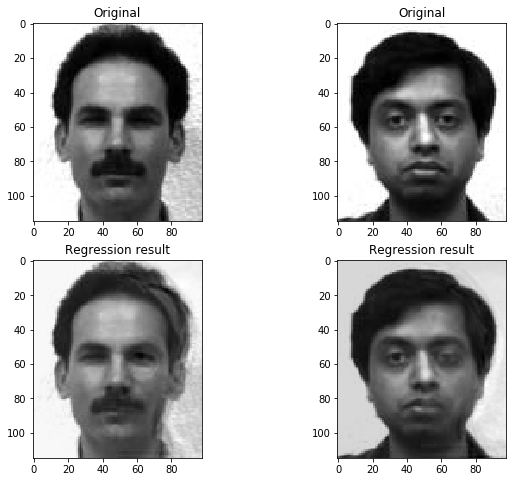

In [21]:
test_predict_face()

## Report: Part 3 - Face prediction (1)
**Estimate the right part of the faces by using linear fitting.**

For the task, function `ii_proc_train` is implemented to pre-process images to construct x and y value in training datasets and function `ii_apply_fit_face` is made similarily to process the input query and then to apply fitting. 

To do linear fitting from the left half part to the right half one, we train multiple linear models for each pixel at the right part using all pixels of the left part from all images. Therefore, the shape of the input matrix is `[Number of images, length*width/2+1]` with ones in the last column and raveled image in the left ones. And the shape of the output matrix is `[Number of images, length*width/2]`. The above works only for even-width images. The situation is just a little bit different for odd-width images by giving either input or output matrix one more column. Here, we put it to the output matrix.

# Problem 4. 2P.
Regularization is important for avoiding over-fitting on a noisy data input. For the case of images, the model has too much weights and so, regularization might help to improve results significantly.
* Implement function `ii_predict_face_reg` that solves the problem from Exercise 3 using ridge regression.
It should take the same arguments as `ii_function_predict_face`, except for an additional argument which is the regularization strength $\lambda$. 

You can use function `test_predict_face_reg` to test your implementation.
* Research, how the choice of $\lambda$ contributes to the results.
* Report your findings.

In [22]:
def ii_predict_face_reg(d, q, lam):
    
    x_train, y_train = ii_proc_train(d)
    theta = ridge_regression(x_train, y_train, lam).transpose()
    prediction = ii_apply_fit_face(q, theta)
    
    return prediction

In [23]:
def test_predict_face_reg():
    dataset = []

    DATA_FOLDER = '../materials/small_dataset/'
    
    for f in os.listdir(DATA_FOLDER):
        if f.endswith('jpg'):
            path = os.path.join(DATA_FOLDER, f)
            dataset.append(plt.imread(path))
        
    dataset = np.asarray(dataset, dtype=np.float32)
    
    d_train, d_val = train_test_split(dataset)
    query = d_val[:, :, :d_val.shape[-1] // 2]
    prediction = ii_predict_face_reg(d_train, query, 1e2)
    predicted_full = np.concatenate((query, prediction), axis=2)

    i = np.random.choice(len(d_val) - 1)

    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    ax[0, 0].imshow(d_val[i], cmap=plt.cm.gray)
    ax[0, 0].set_title('Original')

    ax[1, 0].imshow(predicted_full[i], cmap=plt.cm.gray)
    ax[1, 0].set_title('Regression result')

    ax[0, 1].imshow(d_val[i + 1], cmap=plt.cm.gray)
    ax[0, 1].set_title('Original')
    
    ax[1, 1].imshow(predicted_full[i + 1], cmap=plt.cm.gray)
    ax[1, 1].set_title('Regression result')

In [30]:
def test_fit_face_ridge_cv():
    lambdas = [1e-7, 1e-3, 1, 100, 1000]
    
    dataset = []
    DATA_FOLDER = '../materials/small_dataset/'
    for f in os.listdir(DATA_FOLDER):
        if f.endswith('jpg'):
            path = os.path.join(DATA_FOLDER, f)
            dataset.append(plt.imread(path))      
    dataset = np.asarray(dataset, dtype=np.float32)
    
    d_train, d_val = train_test_split(dataset)
    query = d_val[:, :, :d_val.shape[-1] // 2]
    
    x_train, y_train = ii_proc_train(d_train)
    face_ridge_cv = RidgeCV(lambdas, store_cv_values=True)
    face_ridge_cv.fit(x_train, y_train)
    
    print('Lambda:', lambdas)
    print('MSE:', np.mean(face_ridge_cv.cv_values_, axis=0))

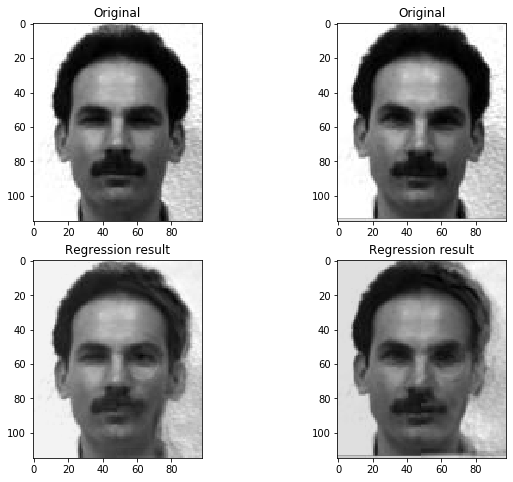

In [38]:
test_predict_face_reg()

In [32]:
test_fit_face_ridge_cv()

Lambda: [1e-07, 0.001, 1, 100, 1000]
MSE: [[ 524.44945931  524.44945969  524.44978865  524.48237445  524.77736429]
 [ 709.36643185  709.36643211  709.36663434  709.38667166  709.56847628]
 [ 849.04744205  849.04744226  849.04757473  849.06069785  849.17955024]
 ...
 [3900.85444016 3900.85443692 3900.85090537 3900.50111191 3897.33741522]
 [4131.06763761 4131.06763297 4131.06268472 4130.57260482 4126.1431886 ]
 [3696.77789612 3696.77789218 3696.77367718 3696.35619943 3692.58124815]]


## Report: Part 4 - Face prediction (2)
**Estimate the right part of faces by using ridge regression and research how λ influences the quality of your model.**

Similar to Problem 3, function `test_fit_face_ridge_cv` is implemented using `ridgeCV` to do cross-validation for ridge regression. As shown from the above statistics, the almost same MSEs for all $\lambda$ candidate values suggest that ridge regression here do not help to shrink parameters and help model quality. It is because the ridge fitting is applied based on the linear fitting, which generally do not have the problem of over-fitting.

# Problem 5. +4P.
Solve problems from Exercise 3 and 4 for dataset of bigger images. For this problem, create copy of `ii_predict_face_reg` add to its names postfix `_big`.
	
The problem here is the size. Analytical method requires expensive operation (matrix inversion, see (Normal Equation)). After the introduction of regularizer, the total size of the problem becomes too big. Estimate the size of matrices for closed form solution of this problem (report it) and you will see that inversion of this matrix is too expensive (it requires O($n^3$) operations).
	
What could be done: iterative methods (see gradient descent (GD) and stochastic average gradient (SAG)) or use extremely powerful PC :).
	
To test your solution use `test_predict_face_reg_big`.

## Report: Part 5 - Iterative methods
**Solve problems from Exercise 3 and 4 for dataset of bigger images.** 
	
For our task, the shape of the bigger images is `(165, 231, 195)` and the shape of the training dataset is `(123, 231, 195)`. After transfering the left part into one vector, the size of the input matrix during fitting calculation would be `(22407, 123)` and the output matrix'size is `(123, 22638)`. Therefore, the size of the model parameter will be `(22407, 22638)`. 

The closed form solution of the problem would be $\theta = (\lambda I + ZZ^T)^{(-1)}Zy$. As we can see, we need to calcualte the inversion matrix of $ZZ^T$ whose size is already `(22407, 22407)`. It will require at least `1e12` floating point numbers (at 8 bytes per number, this comes to 8000 gigabytes.), which is impossible to for computers solve right now.

While sorry for time limited, I haven't run through the iterative methods.

In [44]:
def ii_predict_face_reg_big (d, q, lam):
    
    x_train, y_train = ii_proc_train(d)
    theta = ii_gd_fit(x_train, y_train)
    prediction = ii_apply_fit_face(q, theta)
    
    return prediction

In [45]:
def ii_gd_fit(x_train, y_train):
    
    # remove the extended ones for GD methods
    x_train = x_train[:,:-1]
    thetashp = y_train.shape[1]
    
    # initialization
    theta = np.zeros([thetashp,thetashp])
    m = 0
    c = 0
    L = 0.001  # the learning rate
    epochs = 10  # the number of iterations to perform gradient descent
    
    # perform Gradient Descent 
    n = float(len(x_train))
    
    for i in range(epochs): 
        y_pred = m*x_train + c  #the current predicted value of Y
        D_m = (-2/n) * sum(x_train * (y_train - y_pred))  # derivative wrt m
        D_c = (-2/n) * sum(y_train - y_pred)  # derivative wrt c
        m = m - L * D_m  # update m
        c = c - L * D_c  # update c
        
    theta = np.array([m,c])
    
    return theta

In [46]:
def test_predict_face_reg_big():
    dataset = []

    DATA_FOLDER = '../materials/dataset/'
    
    for f in os.listdir(DATA_FOLDER):
        if f.endswith('pgm'):
            path = os.path.join(DATA_FOLDER, f)
            dataset.append(plt.imread(path))
        
    dataset = np.asarray(dataset, dtype=np.float32)
    
    d_train, d_val = train_test_split(dataset)
    query = d_val[:, :, :d_val.shape[-1] // 2]
    prediction = ii_predict_face_reg_big(d_train, query, 1e2)
    predicted_full = np.concatenate((query, prediction), axis=2)

    i = np.random.choice(len(d_val) - 1)

    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    ax[0, 0].imshow(d_val[i], cmap=plt.cm.gray)
    ax[0, 0].set_title('Original')

    ax[1, 0].imshow(predicted_full[i], cmap=plt.cm.gray)
    ax[1, 0].set_title('Regression result')

    ax[0, 1].imshow(d_val[i + 1], cmap=plt.cm.gray)
    ax[0, 1].set_title('Original')
    
    ax[1, 1].imshow(predicted_full[i + 1], cmap=plt.cm.gray)
    ax[1, 1].set_title('Regression result')

In [47]:
test_predict_face_reg_big()

ValueError: operands could not be broadcast together with shapes (123,22638) (123,22407) 